In [ ]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 45738785.40it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print(len(train_loader))
print(len(test_loader))


12500
2500


### Helper function
To display images in the training set

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78d89944f9a0>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78d89944f9a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
: can only test a child process    
if w.is_alive():
  File "/usr/lib/

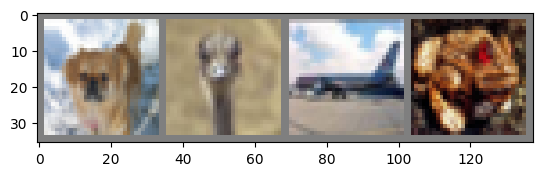

  dog  bird plane  frog


In [ ]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [ ]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.019
[1, 2000] loss: 1.958
[1, 2250] loss: 1.897
[1, 2500] loss: 1.838
[1, 2750] loss: 1.788
[1, 3000] loss: 1.726
Epoch 1, Loss: 0.0693
[2, 250] loss: 1.692
[2, 500] loss: 1.656
[2, 750] loss: 1.639
[2, 1000] loss: 1.594
[2, 1250] loss: 1.581
[2, 1500] loss: 1.537
[2, 1750] loss: 1.542
[2, 2000] loss: 1.545
[2, 2250] loss: 1.533
[2, 2500] loss: 1.514
[2, 2750] loss: 1.479
[2, 3000] loss: 1.485
Epoch 2, Loss: 0.0596
[3, 250] loss: 1.446
[3, 500] loss: 1.449
[3, 750] loss: 1.449
[3, 1000] loss: 1.399
[3, 1250] loss: 1.409
[3, 1500] loss: 1.383
[3, 1750] loss: 1.375
[3, 2000] loss: 1.394
[3, 2250] loss: 1.368
[3, 2500] loss: 1.384
[3, 2750] loss: 1.347
[3, 3000] loss: 1.346
Epoch 3, Loss: 0.0555
Training Complete


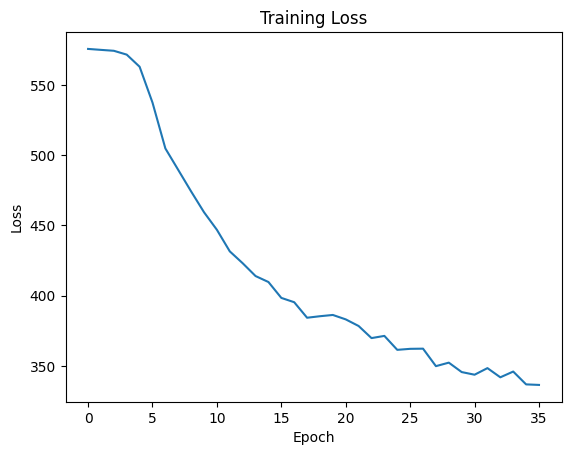

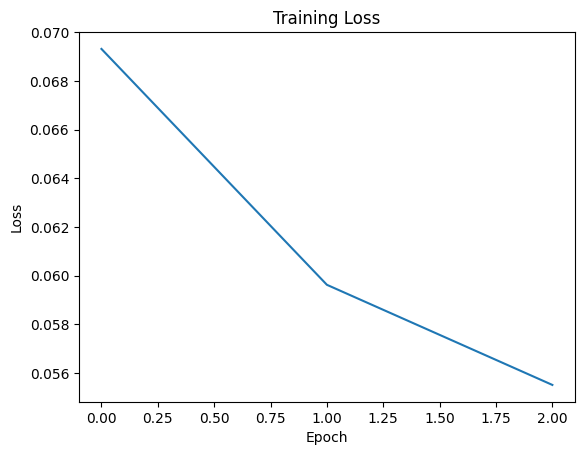

In [ ]:
### Complete the code in the training box

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
average_loss_per_epoch = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    total_batches = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        optimizer.zero_grad()
        # Forward pass
        outputs = net(inputs.cuda()) # Ensure inputs are transferred to GPU with .cuda()
        # Calculate loss
        loss = criterion(outputs, labels.cuda()) # Ensure labels are transferred to GPU with .cuda()
        # Backward pass
        loss.backward()
        # Optimize
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        total_batches += 1
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
    epoch_loss = running_loss / total_batches if total_batches else 0
    average_loss_per_epoch.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

# complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  ## complete code
    plt.plot(running_loss_list)
    plt.ylabel('Loss')
    plt.xlabel('Every 250 mini-batches')
    plt.title('Training Loss')
    plt.show()

def plot_loss_curve(average_loss_per_epoch):
  ## complete code
    plt.plot(average_loss_per_epoch)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training Loss')
    plt.show()

plot_loss_curve(running_loss_list)
plot_loss_curve(average_loss_per_epoch)


(ii) Paste the above code in the code block below and modify it to use GPUs for training


In [ ]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

# SLightly Modified Code Here - SL
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
average_loss_per_epoch = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    total_batches = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #===============================================#
        optimizer.zero_grad()
        # Forward pass
        outputs = net(inputs.cuda()) # Ensure inputs are transferred to GPU with .cuda()
        # Calculate loss
        loss = criterion(outputs, labels.cuda()) # Ensure labels are transferred to GPU with .cuda()
        # Backward pass
        loss.backward()
        # Optimize
        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        total_batches += 1
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
    epoch_loss = running_loss / total_batches if total_batches else 0
    average_loss_per_epoch.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)



[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.252
[1, 1500] loss: 2.150
[1, 1750] loss: 2.019
[1, 2000] loss: 1.958
[1, 2250] loss: 1.897
[1, 2500] loss: 1.838
[1, 2750] loss: 1.787
[1, 3000] loss: 1.726
Epoch 1, Loss: 0.0693
[2, 250] loss: 1.692
[2, 500] loss: 1.655
[2, 750] loss: 1.639
[2, 1000] loss: 1.594
[2, 1250] loss: 1.582
[2, 1500] loss: 1.539
[2, 1750] loss: 1.543
[2, 2000] loss: 1.546
[2, 2250] loss: 1.533
[2, 2500] loss: 1.514
[2, 2750] loss: 1.481
[2, 3000] loss: 1.488
Epoch 2, Loss: 0.0597
[3, 250] loss: 1.447
[3, 500] loss: 1.450
[3, 750] loss: 1.450
[3, 1000] loss: 1.402
[3, 1250] loss: 1.410
[3, 1500] loss: 1.382
[3, 1750] loss: 1.377
[3, 2000] loss: 1.395
[3, 2250] loss: 1.367
[3, 2500] loss: 1.384
[3, 2750] loss: 1.348
[3, 3000] loss: 1.347
Epoch 3, Loss: 0.0555
[4, 250] loss: 1.311
[4, 500] loss: 1.305
[4, 750] loss: 1.314
[4, 1000] loss: 1.346
[4, 1250] loss: 1.286
[4, 1500] loss: 1.289
[4, 1750] loss: 1.274


### Testing the network

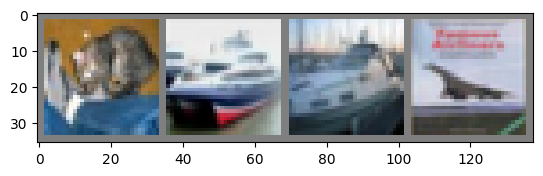

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car truck plane


In [ ]:
## displaying images from test set
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set.

In [ ]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = acc = 100 * correct / total
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 60 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

 20%|██        | 1/5 [00:52<03:29, 52.36s/it]

Epoch 1 completed


 40%|████      | 2/5 [01:44<02:35, 51.94s/it]

Epoch 2 completed


 60%|██████    | 3/5 [02:36<01:44, 52.06s/it]

Epoch 3 completed


 80%|████████  | 4/5 [03:27<00:51, 51.84s/it]

Epoch 4 completed


100%|██████████| 5/5 [04:19<00:00, 51.85s/it]

Epoch 5 completed


Accuracy of the network on the 10000 test images: 62 %


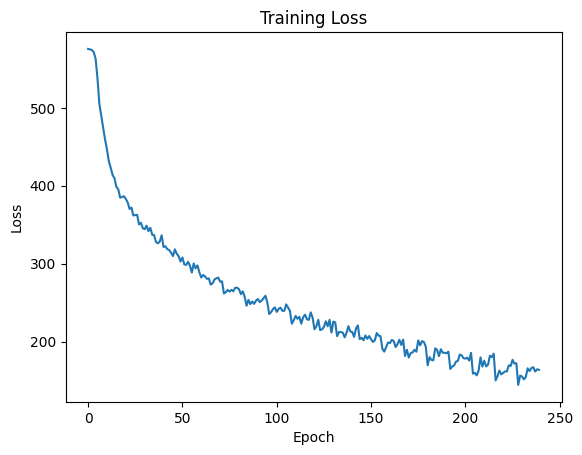

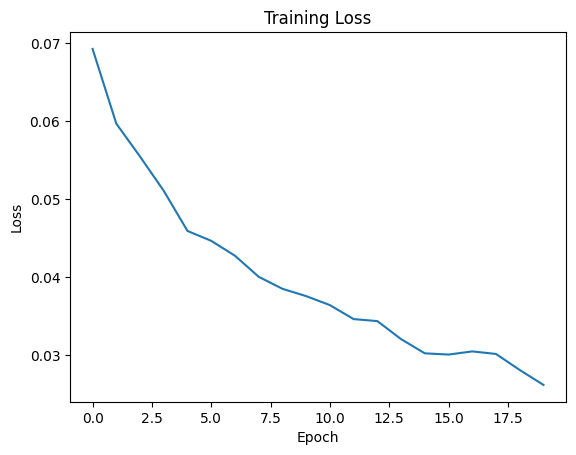

  5%|▌         | 1/20 [00:52<16:29, 52.06s/it]

Epoch 1 completed


 10%|█         | 2/20 [01:43<15:35, 51.95s/it]

Epoch 2 completed


 15%|█▌        | 3/20 [02:35<14:41, 51.83s/it]

Epoch 3 completed


 20%|██        | 4/20 [03:27<13:52, 52.00s/it]

Epoch 4 completed


 25%|██▌       | 5/20 [04:19<12:58, 51.91s/it]

Epoch 5 completed


 30%|███       | 6/20 [05:10<12:04, 51.72s/it]

Epoch 6 completed


 35%|███▌      | 7/20 [06:02<11:12, 51.75s/it]

Epoch 7 completed


 40%|████      | 8/20 [06:54<10:19, 51.64s/it]

Epoch 8 completed


 45%|████▌     | 9/20 [07:46<09:30, 51.91s/it]

Epoch 9 completed


 50%|█████     | 10/20 [08:38<08:39, 51.93s/it]

Epoch 10 completed


 55%|█████▌    | 11/20 [09:30<07:47, 51.91s/it]

Epoch 11 completed


 60%|██████    | 12/20 [10:22<06:54, 51.82s/it]

Epoch 12 completed


 65%|██████▌   | 13/20 [11:13<06:01, 51.67s/it]

Epoch 13 completed


 70%|███████   | 14/20 [12:06<05:11, 51.95s/it]

Epoch 14 completed


 75%|███████▌  | 15/20 [12:57<04:18, 51.75s/it]

Epoch 15 completed


 80%|████████  | 16/20 [13:48<03:26, 51.62s/it]

Epoch 16 completed


 85%|████████▌ | 17/20 [14:40<02:34, 51.66s/it]

Epoch 17 completed


 90%|█████████ | 18/20 [15:32<01:43, 51.75s/it]

Epoch 18 completed


 95%|█████████▌| 19/20 [16:24<00:51, 51.80s/it]

Epoch 19 completed


100%|██████████| 20/20 [17:16<00:00, 51.81s/it]

Epoch 20 completed


Accuracy of the network on the 10000 test images: 59 %


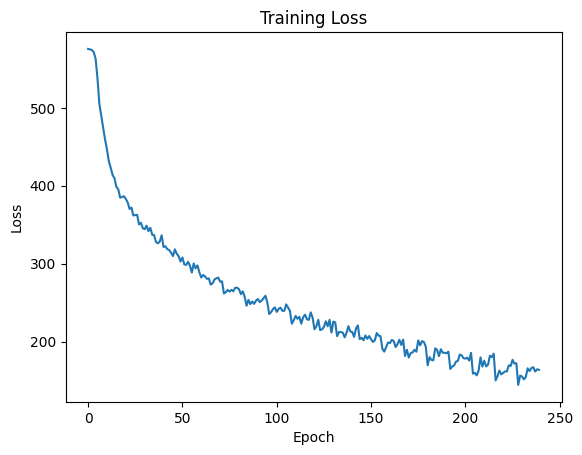

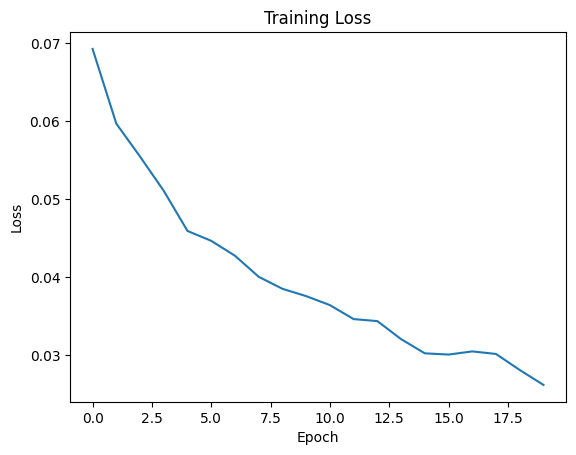

 20%|██        | 1/5 [00:19<01:18, 19.67s/it]

Epoch 1 completed


 40%|████      | 2/5 [00:39<01:00, 20.05s/it]

Epoch 2 completed


 60%|██████    | 3/5 [01:00<00:40, 20.46s/it]

Epoch 3 completed


 80%|████████  | 4/5 [01:21<00:20, 20.36s/it]

Epoch 4 completed


100%|██████████| 5/5 [01:41<00:00, 20.23s/it]

Epoch 5 completed


Accuracy of the network on the 10000 test images: 57 %


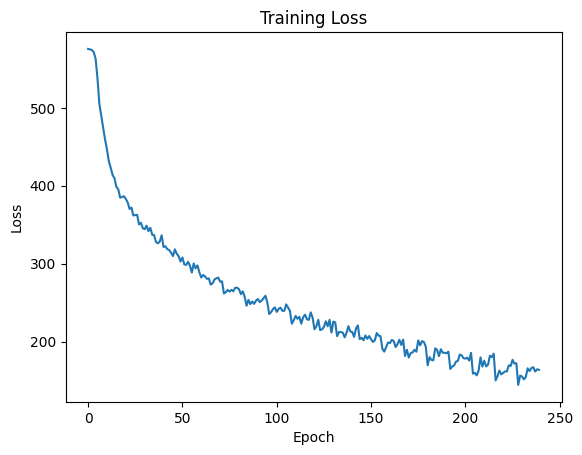

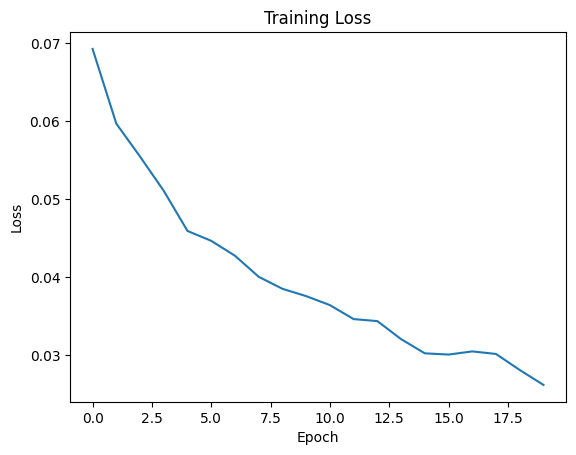

  5%|▌         | 1/20 [00:19<06:09, 19.45s/it]

Epoch 1 completed


 10%|█         | 2/20 [00:39<05:58, 19.93s/it]

Epoch 2 completed


 15%|█▌        | 3/20 [01:00<05:41, 20.12s/it]

Epoch 3 completed


 20%|██        | 4/20 [01:19<05:18, 19.88s/it]

Epoch 4 completed


 25%|██▌       | 5/20 [01:40<05:02, 20.17s/it]

Epoch 5 completed


 30%|███       | 6/20 [02:00<04:44, 20.33s/it]

Epoch 6 completed


 35%|███▌      | 7/20 [02:20<04:22, 20.16s/it]

Epoch 7 completed


 40%|████      | 8/20 [02:42<04:07, 20.61s/it]

Epoch 8 completed


 45%|████▌     | 9/20 [03:02<03:46, 20.61s/it]

Epoch 9 completed


 50%|█████     | 10/20 [03:22<03:23, 20.36s/it]

Epoch 10 completed


 55%|█████▌    | 11/20 [03:43<03:04, 20.52s/it]

Epoch 11 completed


 60%|██████    | 12/20 [04:04<02:44, 20.52s/it]

Epoch 12 completed


 65%|██████▌   | 13/20 [04:24<02:23, 20.48s/it]

Epoch 13 completed


 70%|███████   | 14/20 [04:44<02:02, 20.43s/it]

Epoch 14 completed


 75%|███████▌  | 15/20 [05:05<01:42, 20.50s/it]

Epoch 15 completed


 80%|████████  | 16/20 [05:26<01:22, 20.57s/it]

Epoch 16 completed


 85%|████████▌ | 17/20 [05:45<01:00, 20.30s/it]

Epoch 17 completed


 90%|█████████ | 18/20 [06:07<00:41, 20.62s/it]

Epoch 18 completed


 95%|█████████▌| 19/20 [06:27<00:20, 20.63s/it]

Epoch 19 completed


100%|██████████| 20/20 [06:47<00:00, 20.39s/it]

Epoch 20 completed


Accuracy of the network on the 10000 test images: 63 %


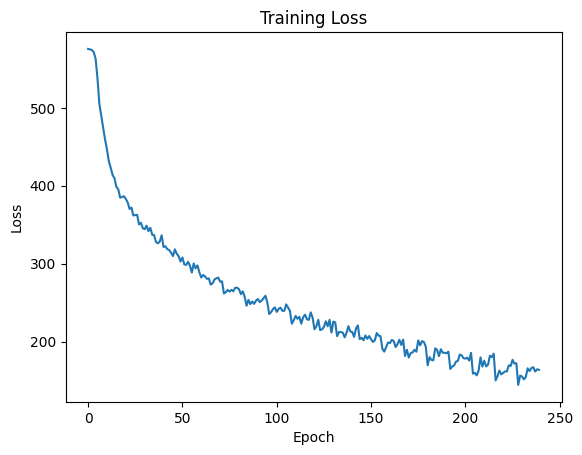

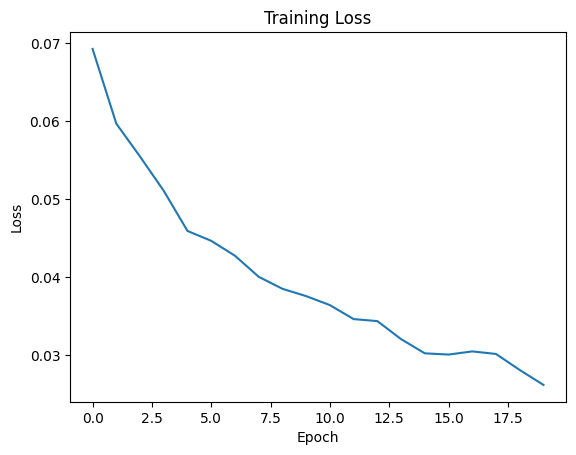

In [ ]:
from tqdm import tqdm
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250

  Author: Simon Lee
  """
  net = Net()
  if use_gpu:
      net.cuda()

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

  running_loss_list = []
  average_loss_per_epoch = []
  for epoch in tqdm(range(num_epochs), desc='Epoch Progress'):
      running_loss = 0.0
      total_loss = 0.0  # Total loss for the epoch
      total_batches = 0  # Total number of batches processed in the epoch
      for i, data in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}'), 0):
          inputs, labels = data
          if use_gpu:
              inputs, labels = inputs.cuda(), labels.cuda()

          optimizer.zero_grad()

          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          total_loss += loss.item()
          total_batches += 1
          if i % 250 == 249:
              running_loss_list.append(running_loss / 250)
              running_loss = 0.0
      average_loss_per_epoch.append(total_loss / total_batches)
      print(f'Epoch {epoch+1} completed with average loss: {average_loss_per_epoch[-1]:.4f}')

  torch.save(net.state_dict(), model_save_path)
  return running_loss_list, average_loss_per_epoch

def test(test_loader=test_loader, model_path='./net.pth'):
  """
  Author: Simon Lee
  """

  ### complete the code to compute accuracy and store it as the variable acc
  net = Net()
  net.load_state_dict(torch.load(model_path))
  net.cuda() if next(net.parameters()).is_cuda else net

  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          if next(net.parameters()).is_cuda:
              images, labels = images.cuda(), labels.cuda()
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  acc = 100 * correct / total
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc))
  return acc

# main
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

# BATCH 4 EPOCH 5
loss = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
_ = test(test_loader=test_loader, model_path='./net.pth')
plot_loss_curve(running_loss_list)
plot_loss_curve(average_loss_per_epoch)
# BATCH 4 EPOCH 20
loss = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
_ = test(test_loader=test_loader, model_path='./net.pth')
plot_loss_curve(running_loss_list)
plot_loss_curve(average_loss_per_epoch)

batch_size = 16 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

# BATCH 16 EPOCH 5
loss = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
_ = test(test_loader=test_loader, model_path='./net.pth')
plot_loss_curve(running_loss_list)
plot_loss_curve(average_loss_per_epoch)
# BATCH 16 EPOCH 20
loss = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
_ = test(test_loader=test_loader, model_path='./net.pth')
plot_loss_curve(running_loss_list)
plot_loss_curve(average_loss_per_epoch)

